In [1]:
"""Pandas library."""

'Pandas library.'

## DataFrame and Series

Pandas has two main objects: DataFrame and Series. To simplify things a little, we can say that DataFrame is a table (and therefore a two-dimensional array), while Series is a column in this table (and therefore a one-dimensional array).
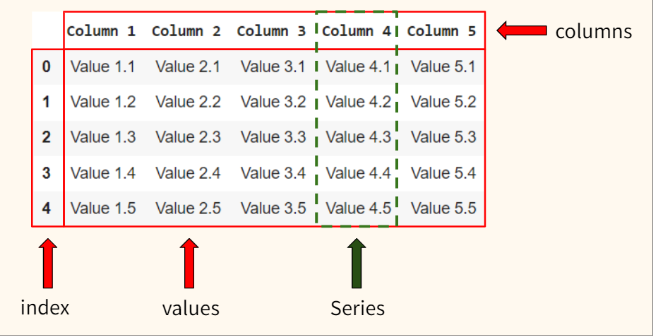

### Creating a DataFrame
#### Method 1. Creating a DataFrame from file

In [2]:
import numpy as np
import pandas as pd

```
import pandas as pd
csv_zip = pd.read_csv("/Users/Downloads/train.csv")
csv_zip.head(3) 

```

A dataframe can be created by importing files in various formats. We have already done this with .csv files using the pd.read_csv() function. Similarly, files in other formats, such as MS Excel or html, can be imported.

```
excel_data = pd.read_excel("/Users/dayal/Downloads/iris.xlsx", sheet_name=0)
excel_data.head(3)
```

MS Excel. Similarly, we can import files in Excel format.

In example above method .head(3) will display first 3 lines of DataFrame

```
html_data = pd.read_html(
    "https://en.wikipedia.org/wiki/World_population",
    storage_options={"User-Agent": "Mozilla/5.0"},
)
html_data[0]
```

 Data can be loaded not only from a file, but also from the Internet. The read_html() function is suitable for this purpose. By and large, this is an example of simple web scraping, i.e., obtaining information from web pages in an automated mode.

#### Method 2. Connecting to SQL


```
conn = sql.connect("/Users/dayal/Downloads/chinook.db")

sql_data = pd.read_sql("SELECT * FROM tracks;", conn)

sql_data.head(3)
```

The Pandas library allows you to retrieve information directly from an SQL database. As an example, let's take the popular Chinook training database, which contains information about a digital media store.

#### Method 3. Creating a DataFrame from `dict()` type


In [5]:
country: np.ndarray = np.array(
    [
        "China",
        "Vietnam",
        "United Kingdom",
        "Russia",
        "Argentina",
        "Bolivia",
        "South Africa",
    ]
)
capital: list[str] = [
    "Beijing",
    "Hanoi",
    "London",
    "Moscow",
    "Buenos Aires",
    "Sucre",
    "Pretoria",
]
population: list[int] = [1400, 97, 67, 144, 45, 12, 59]
area: list[float] = [9.6, 0.3, 0.2, 17.1, 2.8, 1.1, 1.2]
sea: list[int] = [1] * 5 + [0, 1]
# country: NumPy array of country names (7 entries)
# capital: list of capital city names
# corresponding to each country
# population: list of population values
# aligned with the country order
# area: list of area values aligned with
# the country order (units not specified)
# sea: list of binary flags where 1 indicates
# access to the sea and 0 indicates no sea access
# These parallel sequences will be combined
# into a dictionary/DataFrame in the following cell.

In [6]:
countries_dict: dict[str, list[str] | list[int] | list[float]] = {}

countries_dict["country"] = list(country)
countries_dict["capital"] = capital
countries_dict["population"] = population
countries_dict["area"] = area
countries_dict["sea"] = sea
# Initialize an empty dictionary to hold columns for the DataFrame.
# Convert the NumPy array `country` to
# Python list and store it under the 'country' key.
# Store the list of capital city names under the 'capital' key.
# Store the population values under the 'population' key.
# Store the area values under the 'area' key.
# Store the binary sea-access flags under the 'sea' key.
# Ensure all columns have equal length
# to prevent errors when creating the DataFrame.

In [8]:
# Create a Pandas DataFrame from the dictionary and display it.
countries = pd.DataFrame(countries_dict)
countries

,country,capital,population,area,sea
0,China,Beijing,1400,9.6,1
1,Vietnam,Hanoi,97,0.3,1
2,United Kingdom,London,67,0.2,1
3,Russia,Moscow,144,17.1,1
4,Argentina,Buenos Aires,45,2.8,1
5,Bolivia,Sucre,12,1.1,0
6,South Africa,Pretoria,59,1.2,1


#### Method 4. Creating a DataFrame from Numpy 2D(2 dimensional) array


In [9]:
arr = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])

pd.DataFrame(arr)

,0,1,2
0,1,1,1
1,2,2,2
2,3,3,3


## DataFrame structure and properties


In [13]:
# display columns of dataframe object
countries.columns

Index(['country', 'capital', 'population', 'area', 'sea'], dtype='object')

In [14]:
# display index of dataframe object
countries.index

RangeIndex(start=0, stop=7, step=1)

In [15]:
# display values of dataframe object
countries.values

array([['China', 'Beijing', 1400, 9.6, 1],
       ['Vietnam', 'Hanoi', 97, 0.3, 1],
       ['United Kingdom', 'London', 67, 0.2, 1],
       ['Russia', 'Moscow', 144, 17.1, 1],
       ['Argentina', 'Buenos Aires', 45, 2.8, 1],
       ['Bolivia', 'Sucre', 12, 1.1, 0],
       ['South Africa', 'Pretoria', 59, 1.2, 1]], dtype=object)

In [16]:
# We can also obtain the index and column
# names using the axes attribute (plural of axis) with
# indices [0] and [1], respectively.
countries.axes[0]

RangeIndex(start=0, stop=7, step=1)

In general, it is useful to remember that axis = 0 allows you to apply any method to the rows of a data frame, and axis = 1, respectively, to the columns.

In [17]:
countries.axes[1]

Index(['country', 'capital', 'population', 'area', 'sea'], dtype='object')

In [18]:
countries.ndim, countries.shape, countries.size

(2, (7, 5), 35)

We can also view the number of measurements, the dimension, and the total number of elements in the data frame using the ndim, shape, and size attributes, respectively.

In [19]:
# Returns the data type of each column.
countries.dtypes

country        object
capital        object
population      int64
area          float64
sea             int64
dtype: object

In [20]:
countries.memory_usage()

Index         132
country        56
capital        56
population     56
area           56
sea            56
dtype: int64

Using the `.memory_usage()` method, we can view the amount of memory occupied by columns in bytes.

## Index
### Assigning an index


In [21]:
custom_index: list[str] = ["CN", "VN", "GB", "RU", "AR", "BO", "ZA"]

In [22]:
countries = pd.DataFrame(countries_dict, index=custom_index)
countries

,country,capital,population,area,sea
CN,China,Beijing,1400,9.6,1
VN,Vietnam,Hanoi,97,0.3,1
GB,United Kingdom,London,67,0.2,1
RU,Russia,Moscow,144,17.1,1
AR,Argentina,Buenos Aires,45,2.8,1
BO,Bolivia,Sucre,12,1.1,0
ZA,South Africa,Pretoria,59,1.2,1


In [23]:
# The index can be reset using the
# .reset_index() method.
countries.reset_index(inplace=True)
countries

,index,country,capital,population,area,sea
0,CN,China,Beijing,1400,9.6,1
1,VN,Vietnam,Hanoi,97,0.3,1
2,GB,United Kingdom,London,67,0.2,1
3,RU,Russia,Moscow,144,17.1,1
4,AR,Argentina,Buenos Aires,45,2.8,1
5,BO,Bolivia,Sucre,12,1.1,0
6,ZA,South Africa,Pretoria,59,1.2,1


In [24]:
# As we can see, the previous index has become
# a separate column. Let's make this column
# an index again using the .set_index() method.
countries.set_index("index", inplace=True)
countries

,country,capital,population,area,sea
index,,,,,
CN,China,Beijing,1400,9.6,1
VN,Vietnam,Hanoi,97,0.3,1
GB,United Kingdom,London,67,0.2,1
RU,Russia,Moscow,144,17.1,1
AR,Argentina,Buenos Aires,45,2.8,1
BO,Bolivia,Sucre,12,1.1,0
ZA,South Africa,Pretoria,59,1.2,1


Let's reset the index again, but this time we won't make it a separate column. To do this, we'll pass the parameter drop = True to the .`reset_index()` method.

In [25]:
countries.reset_index(drop=True, inplace=True)
countries

,country,capital,population,area,sea
0,China,Beijing,1400,9.6,1
1,Vietnam,Hanoi,97,0.3,1
2,United Kingdom,London,67,0.2,1
3,Russia,Moscow,144,17.1,1
4,Argentina,Buenos Aires,45,2.8,1
5,Bolivia,Sucre,12,1.1,0
6,South Africa,Pretoria,59,1.2,1


You can create your own index by simply placing new values in the index attribute.

In [26]:
countries.index = pd.Index(custom_index)
countries

,country,capital,population,area,sea
CN,China,Beijing,1400,9.6,1
VN,Vietnam,Hanoi,97,0.3,1
GB,United Kingdom,London,67,0.2,1
RU,Russia,Moscow,144,17.1,1
AR,Argentina,Buenos Aires,45,2.8,1
BO,Bolivia,Sucre,12,1.1,0
ZA,South Africa,Pretoria,59,1.2,1


## MultiIndex

A multi-level (MultiIndex) or hierarchical index allows you to specify multiple levels for indexing rows or columns. An "external" index combines several elements of an "internal" index.

In [27]:
# create a list of tuples with
# name of the continent and the country code
rows: list[tuple[str, str]] = [
    ("Asia", "CN"),
    ("Asia", "VN"),
    ("Europe", "GB"),
    ("Europe", "RU"),
    ("S. America", "AR"),
    ("S. America", "BO"),
    ("Africa", "ZA"),
]

# In the columns, we will combine the names of
# countries and capitals into the category names.
# Population size, area, and access to
# the sea will be combined into the category data.
cols: list[tuple[str, str]] = [
    ("names", "country"),
    ("names", "capital"),
    ("data", "population"),
    ("data", "area"),
    ("data", "sea"),
]

# Now let's create a hierarchical index for
# rows and columns using the pd.MultiIndex.from_tuples() function.
custom_multindex = pd.MultiIndex.from_tuples(rows, names=["region", "code"])
# # Let's do the same for columns
custom_multicols = pd.MultiIndex.from_tuples(cols)

# Finally, we need to transfer these indexes to
# the index and columns attributes and display it
countries.index = pd.Index(custom_multindex)
countries.columns = custom_multicols

countries

names                     data          
                         country       capital population  area sea
(Asia, CN)                 China       Beijing       1400   9.6   1
(Asia, VN)               Vietnam         Hanoi         97   0.3   1
(Europe, GB)      United Kingdom        London         67   0.2   1
(Europe, RU)              Russia        Moscow        144  17.1   1
(S. America, AR)       Argentina  Buenos Aires         45   2.8   1
(S. America, BO)         Bolivia         Sucre         12   1.1   0
(Africa, ZA)        South Africa      Pretoria         59   1.2   1

In [28]:
# Let's return to the usual index and column names.
custom_cols = ["country", "capital", "population", "area", "sea"]

countries.index = pd.Index(custom_index)
countries.columns = custom_cols

countries

,country,capital,population,area,sea
CN,China,Beijing,1400,9.6,1
VN,Vietnam,Hanoi,97,0.3,1
GB,United Kingdom,London,67,0.2,1
RU,Russia,Moscow,144,17.1,1
AR,Argentina,Buenos Aires,45,2.8,1
BO,Bolivia,Sucre,12,1.1,0
ZA,South Africa,Pretoria,59,1.2,1


## Conversion to other formats


A datetime frame can be converted to a dictionary using the .to_dict() method.

In [29]:
print(countries.to_dict())

{'country': {'CN': 'China', 'VN': 'Vietnam', 'GB': 'United Kingdom', 'RU': 'Russia', 'AR': 'Argentina', 'BO': 'Bolivia', 'ZA': 'South Africa'}, 'capital': {'CN': 'Beijing', 'VN': 'Hanoi', 'GB': 'London', 'RU': 'Moscow', 'AR': 'Buenos Aires', 'BO': 'Sucre', 'ZA': 'Pretoria'}, 'population': {'CN': 1400, 'VN': 97, 'GB': 67, 'RU': 144, 'AR': 45, 'BO': 12, 'ZA': 59}, 'area': {'CN': 9.6, 'VN': 0.3, 'GB': 0.2, 'RU': 17.1, 'AR': 2.8, 'BO': 1.1, 'ZA': 1.2}, 'sea': {'CN': 1, 'VN': 1, 'GB': 1, 'RU': 1, 'AR': 1, 'BO': 0, 'ZA': 1}}


Similarly, the .to_numpy() method converts data into a Numpy array.

In [30]:
countries.to_numpy()

array([['China', 'Beijing', 1400, 9.6, 1],
       ['Vietnam', 'Hanoi', 97, 0.3, 1],
       ['United Kingdom', 'London', 67, 0.2, 1],
       ['Russia', 'Moscow', 144, 17.1, 1],
       ['Argentina', 'Buenos Aires', 45, 2.8, 1],
       ['Bolivia', 'Sucre', 12, 1.1, 0],
       ['South Africa', 'Pretoria', 59, 1.2, 1]], dtype=object)

```
countries.to_csv("countries.csv", index=False)
```

In addition, we can save the dataframe to a file (in Google Colab, it will appear in session storage). For example, this could be a file in .csv format, in which case we need to use the .to_csv() function.

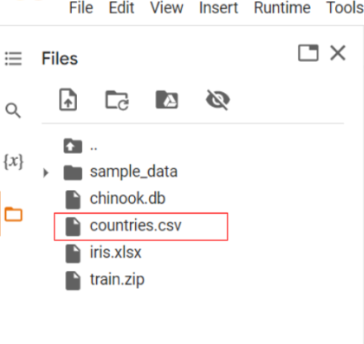

The .to_list() method allows you to convert a Series object (a dataframe column) into a list.

In [31]:
countries.country.tolist()

['China',
 'Vietnam',
 'United Kingdom',
 'Russia',
 'Argentina',
 'Bolivia',
 'South Africa']

## Creating Series
### Creating Series from `list()` type


A Series object can be created from a list. Let's take the following list with country names.

In [32]:
country_list: list[str] = [
    "China",
    "South Africa",
    "United Kingdom",
    "Russia",
    "Argentina",
    "Vietnam",
    "Australia",
]

country_series = pd.Series(country_list, dtype=str)
country_series

0             China
1      South Africa
2    United Kingdom
3            Russia
4         Argentina
5           Vietnam
6         Australia
dtype: object

Please note that a numeric index was automatically created for the Series object. We can use it to access the elements of this object.

In [33]:
country_series.iloc[0]

'China'

## Доступ к строкам и столбцам
### Циклы в датафрейме


In [ ]:
for column in countries:
    print(column)

In [ ]:
for index, row in countries.iterrows():
    print(index)
    print(row)
    print("...")
    print(type(row))
    break

In [ ]:
for _, row in countries.iterrows():
    print(row["capital"] + " is the capital if " + row["country"])
    break

## Доступ к столбцам


In [ ]:
countries["capital"]

In [ ]:
countries.capital

In [ ]:
type(countries.capital)

In [ ]:
countries[["capital"]]

In [ ]:
countries[["capital", "area"]]

In [ ]:
countries.filter(items=["capital", "population"])

## Доступ к строкам


In [ ]:
countries[1:5]

## Методы .loc[] и .iloc[]
### Метод .loc[]


In [ ]:
countries.loc[["CN", "RU", "VN"], ["capital", "population", "area"]]

In [ ]:
countries.loc[:, ["capital", "population", "area"]]

In [ ]:
countries.loc[:, [False, False, False, False, True]]

## Метод .get_loc()


In [ ]:
countries.index.get_loc("RU")

In [ ]:
countries.columns.get_loc("country")

## Метод .iloc[]


In [ ]:
countries.iloc[[0, 3, 5], [0, 1, 2]]

In [ ]:
countries.iloc[:3, -2:]

In [ ]:
countries[["population", "area"]].iloc[[0, 3]]

### Creating Series from `dict` type

In [38]:
country_dict: dict[str, str] = {
    "CN": "China",
    "ZA": "South Africa",
    "GB": "United Kingdom",
    "RU": "Russia",
    "AR": "Argentina",
    "VN": "Vietnam",
    "AU": "Australia",
}

Let's convert dict to `pd.Series()` 

In [62]:
country_series_2 = pd.Series(country_dict)
country_series_2

CN             China
ZA      South Africa
GB    United Kingdom
RU            Russia
AR         Argentina
VN           Vietnam
AU         Australia
dtype: object

## Access via multilevel index

In [41]:
# Assign the hierarchical index `custom_multindex` to the DataFrame `countries`
countries.index = pd.Index(custom_multindex)
# Assign the hierarchical columns `custom_multicols` to the DataFrame `countries`
countries.columns = custom_multicols
# Display the DataFrame `countries` so its contents are shown in the notebook output
countries

names                     data          
                         country       capital population  area sea
(Asia, CN)                 China       Beijing       1400   9.6   1
(Asia, VN)               Vietnam         Hanoi         97   0.3   1
(Europe, GB)      United Kingdom        London         67   0.2   1
(Europe, RU)              Russia        Moscow        144  17.1   1
(S. America, AR)       Argentina  Buenos Aires         45   2.8   1
(S. America, BO)         Bolivia         Sucre         12   1.1   0
(Africa, ZA)        South Africa      Pretoria         59   1.2   1

## Method .at[]

The .at[] method is suitable for retrieving or writing a single data frame value.


In [44]:
countries.at["CN", "capital"]

'Beijing'

## Filters
### Logical mask


As with the Numpy array, we can create a Boolean mask for the dataframe, in which unwanted values will be marked as False.

In [45]:
countries.population > 1000

CN     True
VN    False
GB    False
RU    False
AR    False
BO    False
ZA    False
Name: population, dtype: bool

By applying this mask to the original data frame, we will obtain only those values that are marked as True.

In [46]:
countries[countries.population > 1000]

,country,capital,population,area,sea
CN,China,Beijing,1400,9.6,1


We can apply two masks to the data frame, combined, for example, with the logical AND operator.

In [47]:
countries[(countries.population > 50) & (countries.area < 2)]

,country,capital,population,area,sea
VN,Vietnam,Hanoi,97,0.3,1
GB,United Kingdom,London,67,0.2,1
ZA,South Africa,Pretoria,59,1.2,1


Here is another syntax option. It is convenient to use if you have many conditions by which you want to filter the data frame.

In [63]:
# First, create the masks we need.
population_mask = countries.population > 70
area_mask = countries.population < 50
# then combine them according to
# the necessary conditions (in this case OR)
mask = population_mask | area_mask

# and apply the mask to the original data frame
countries[mask]

,country,capital,population,area,sea
CN,China,Beijing,1400,9.6,1
VN,Vietnam,Hanoi,97,0.3,1
RU,Russia,Moscow,144,17.1,1
AR,Argentina,Buenos Aires,45,2.8,1
BO,Bolivia,Sucre,12,1.1,0


## Method .query()


The .query() method allows you to specify a filtering condition "in your own words."

In [50]:
# For example, let's select countries with a population
# more than 50 million people and an area
# less than two million square kilometers.

countries.query("population > 50 and area < 2")

,country,capital,population,area,sea
VN,Vietnam,Hanoi,97,0.3,1
GB,United Kingdom,London,67,0.2,1
ZA,South Africa,Pretoria,59,1.2,1


When filtering by string values (which are enclosed in quotation marks), you must use different quotation marks: double quotation marks for the .query() method and single quotation marks for string values, or vice versa.

In [51]:
# let's display data for the United Kingdom
countries.query('country == "United Kingdom"')

,country,capital,population,area,sea
GB,United Kingdom,London,67,0.2,1


## Other filtering methods


Using the .isin() method, we can check for the presence of multiple values in a specific column and then use the result as a logical mask.

In [52]:
keyword_list = ["Beijing", "Moscow", "Hanoi"]

print(countries[countries.capital.isin(keyword_list)])

    country  capital  population  area  sea
CN    China  Beijing        1400   9.6    1
VN  Vietnam    Hanoi          97   0.3    1
RU   Russia   Moscow         144  17.1    1


Similarly, you can use the .startswith() method.

In [53]:
print(countries[~countries.country.str.startswith("A")])

           country   capital  population  area  sea
CN           China   Beijing        1400   9.6    1
VN         Vietnam     Hanoi          97   0.3    1
GB  United Kingdom    London          67   0.2    1
RU          Russia    Moscow         144  17.1    1
BO         Bolivia     Sucre          12   1.1    0
ZA    South Africa  Pretoria          59   1.2    1


The .nlargest() method allows you to find the rows with the highest value in a specific column.

In [54]:
countries.nlargest(3, "population")

,country,capital,population,area,sea
CN,China,Beijing,1400,9.6,1
RU,Russia,Moscow,144,17.1,1
VN,Vietnam,Hanoi,97,0.3,1


The .argmax() method returns the index of the row containing the highest value in a specified column.

In [55]:
countries.area.argmax()

3

Let's see which country corresponds to this index.

In [66]:
largest_area_country = countries.iloc[[countries.area.argmax()]]
largest_area_country

,country,capital,population,area,sea
RU,Russia,Moscow,144,17.1,1


Recall that the .loc[] method can accept Boolean data types. Let's use this property to create a filter.

In [57]:
countries.loc[countries.population > 90, :]

,country,capital,population,area,sea
CN,China,Beijing,1400,9.6,1
VN,Vietnam,Hanoi,97,0.3,1
RU,Russia,Moscow,144,17.1,1


The .filter() method, when using the like parameter, searches for matches with the desired phrase in the index (if axis = 0) or column names (if axis = 1).

In [58]:
countries.filter(like="ZA", axis=0)

,country,capital,population,area,sea
ZA,South Africa,Pretoria,59,1.2,1


## Sorting


In [59]:
# sort by the population column without saving changes,
# in ascending order (default value)
countries.sort_values(by="population", inplace=False, ascending=True)

,country,capital,population,area,sea
BO,Bolivia,Sucre,12,1.1,0
AR,Argentina,Buenos Aires,45,2.8,1
ZA,South Africa,Pretoria,59,1.2,1
GB,United Kingdom,London,67,0.2,1
VN,Vietnam,Hanoi,97,0.3,1
RU,Russia,Moscow,144,17.1,1
CN,China,Beijing,1400,9.6,1


In [60]:
# Now let's sort by two columns in descending order
countries.sort_values(by=["area", "population"], inplace=False, ascending=False)

,country,capital,population,area,sea
RU,Russia,Moscow,144,17.1,1
CN,China,Beijing,1400,9.6,1
AR,Argentina,Buenos Aires,45,2.8,1
ZA,South Africa,Pretoria,59,1.2,1
BO,Bolivia,Sucre,12,1.1,0
VN,Vietnam,Hanoi,97,0.3,1
GB,United Kingdom,London,67,0.2,1


In addition, you can sort rows by index using the .sort_index() method.

In [61]:
countries.sort_index()

,country,capital,population,area,sea
AR,Argentina,Buenos Aires,45,2.8,1
BO,Bolivia,Sucre,12,1.1,0
CN,China,Beijing,1400,9.6,1
GB,United Kingdom,London,67,0.2,1
RU,Russia,Moscow,144,17.1,1
VN,Vietnam,Hanoi,97,0.3,1
ZA,South Africa,Pretoria,59,1.2,1
